In [1]:
from api_funcs import *
import re
import nltk

In [4]:
posts = subreddit_posts('stardewvalley', 500)
posts.to_csv(r'C:\Users\yatai\OneDrive\Desktop\phase2msa\redditSVposts.csv')

In [5]:
replies = replies_to_posts(posts)
replies.to_csv(r'C:\Users\yatai\OneDrive\Desktop\phase2msa\redditSVunclean.csv')

In [2]:
redditData = pd.read_csv("redditSVunclean.csv")

In [3]:
#clear user and subreddit tags
for i in range(len(redditData)): 
    redditData.Reply.iloc[i] = re.sub(r'\(?http\S+', '', redditData.Reply.iloc[i])
    redditData.Reply.iloc[i] = re.sub(r'\(?u/\S+', '', redditData.Reply.iloc[i])
    redditData.Reply.iloc[i] = re.sub(r'\(?U/\S+', '', redditData.Reply.iloc[i])
    redditData.Reply.iloc[i] = re.sub(r'\(?r/\S+', '', redditData.Reply.iloc[i])
    redditData.Reply.iloc[i] = re.sub(r'\(?R/\S+', '', redditData.Reply.iloc[i])

c:\users\yatai\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
#clear empty comments
redditData[redditData.Reply == '']

,Unnamed: 0,Reply,Upvote,Time,Key
737,737,,1.0,2020-07-31 15:43:48,0.0
975,975,,2.0,2020-07-31 15:43:22,0.0
1456,1456,,2.0,2020-07-08 03:37:55,0.0
3217,7,,2.0,2020-09-13 07:45:21,83.0
3723,0,,2.0,2020-09-13 00:21:48,141.0
3826,40,,2.0,2020-09-11 03:42:56,151.0
4126,6,,7.0,2020-09-11 04:00:51,189.0
4304,111,,9.0,2020-09-10 17:19:58,200.0
4892,133,,10.0,2020-09-10 09:27:37,245.0
5554,13,,4.0,2020-09-10 10:48:03,302.0


In [4]:
redditData.drop(redditData[redditData.Reply == ''].index, inplace = True)

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [11]:
#check commonly used stardew terms
SV_terms = pd.read_csv("SV_terms.csv")
SV_terms[['neg', 'neu', 'pos', 'compound']] = SV_terms.Plant.apply(lambda x: pd.Series(sid.polarity_scores(x)))
SV_terms[SV_terms['compound'] != 0]

,Plant,neg,neu,pos,compound
43,Sweet Gem Berry,0.000,0.400,0.600,0.4588
54,Sweet Pea,0.000,0.250,0.750,0.4588
113,Super Cucumber,0.000,0.204,0.796,0.5994
128,Fire Quartz,0.706,0.294,0.000,-0.3400
133,Diamond,0.000,0.000,1.000,0.3400
153,Petrified Slime,0.778,0.222,0.000,-0.5423
168,Ghost Crystal,0.697,0.303,0.000,-0.3182
176,Fire Opal,0.706,0.294,0.000,-0.3400
217,Loom,1.000,0.000,0.000,-0.2263
228,Trap Bobber,0.697,0.303,0.000,-0.3182


In [12]:
new_words = {
    'sweet': 0,
    'super': 0,
    'fire': 0,
    'diamond': 0,
    'petrified': 0,
    'ghost': 0,
    'loom': 0,
    'trap': 0,
    'treasure': 0,
    'scarecrow': 0,
    'strange': 0,
    'lucky': 0,
    'surprise': 0,
    'treat': 0,
    'stable': 0,
    'well': 0,
    'broken': 0,
    'axe': 0
}
sid.lexicon.update(new_words)

In [13]:
SV_terms[['neg', 'neu', 'pos', 'compound']] = SV_terms.Plant.apply(lambda x: pd.Series(sid.polarity_scores(x)))
SV_terms[SV_terms['compound'] != 0]

,Plant,neg,neu,pos,compound


In [5]:
redditData.Reply = redditData.Reply.apply(lambda x: ' '.join(nltk.word_tokenize(x)))

In [14]:
redditData[['neg', 'neu', 'pos', 'compound']] = redditData.Reply.apply(lambda x: pd.Series(sid.polarity_scores(x)))

In [17]:
sid.polarity_scores("As such, take the time you want and need.")

{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.0772}

In [15]:
redditData.tail(5)

,Unnamed: 0,Reply,Upvote,Time,Key,neg,neu,pos,compound
7510,9,She's weird but she's not wrong.,5.0,2020-09-08 15:31:25,497.0,0.156,0.461,0.384,0.4554
7511,0,I don't think this belongs in this sub tbh,1.0,2020-09-09 00:12:02,498.0,0.000,1.000,0.000,0.0000
7512,0,Hell to tha muthafuckin YES!! Slay sis!!!\n\nE...,5.0,2020-09-08 13:33:06,499.0,0.158,0.584,0.258,0.4406
7513,1,I love it!,3.0,2020-09-08 12:58:24,499.0,0.000,0.308,0.692,0.6696
7514,2,"Have no fears, what is important is: Slay!",3.0,2020-09-08 14:27:38,499.0,0.000,0.576,0.424,0.5305


In [16]:
#output to use in R
redditData.to_csv(r'C:\Users\yatai\OneDrive\Desktop\phase2msa\redditSVuncleanCompound.csv')

In [21]:
redditData.drop(redditData.columns[len(redditData.columns)-4], axis=1, inplace=True)

,Unnamed: 0,Reply,Upvote,Time,Key
0,0,"This isn't a mod section I know, but I want to...",31.0,2020-05-24 14:45:42,0.0
1,1,If I divorce will my ex spouse dislike me? I j...,29.0,2020-07-08 04:08:04,0.0
2,2,Is it worth it to keep fruits and vegetables f...,24.0,2020-05-23 18:03:11,0.0
3,3,Not a question but a tip to the poor souls scr...,20.0,2020-06-03 16:44:27,0.0
4,4,What is the benefit of gold star vegetables? J...,17.0,2020-05-23 18:06:13,0.0
...,...,...,...,...,...
7510,9,She's weird but she's not wrong.,5.0,2020-09-08 15:31:25,497.0
7511,0,I don't think this belongs in this sub tbh,1.0,2020-09-09 00:12:02,498.0
7512,0,Hell to tha muthafuckin YES!! Slay sis!!!\n\nE...,5.0,2020-09-08 13:33:06,499.0
7513,1,I love it!,3.0,2020-09-08 12:58:24,499.0


In [6]:
#remove punctuation
redditData.Reply = redditData.Reply.apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [7]:
#remove stopwords
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
redditData.Reply = redditData.Reply.apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stopwords]))

In [8]:
#lemmatize words
lemmatizer = nltk.WordNetLemmatizer()
redditData.Reply = redditData.Reply.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]))
redditData

,Unnamed: 0,Reply,Upvote,Time,Key
0,0,nt mod section know want point folk nt know Pa...,31.0,2020-05-24 14:45:42,0.0
1,1,divorce ex spouse dislike hate nursery room,29.0,2020-07-08 04:08:04,0.0
2,2,worth keep fruit vegetable last season sell,24.0,2020-05-23 18:03:11,0.0
3,3,question tip poor soul scrolling wheat worth c...,20.0,2020-06-03 16:44:27,0.0
4,4,benefit gold star vegetable sell something fut...,17.0,2020-05-23 18:06:13,0.0
...,...,...,...,...,...
7510,9,weird wrong,5.0,2020-09-08 15:31:25,497.0
7511,0,nt think belongs sub tbh,1.0,2020-09-09 00:12:02,498.0
7512,0,Hell tha muthafuckin YES Slay si Edit Apologie...,5.0,2020-09-08 13:33:06,499.0
7513,1,love,3.0,2020-09-08 12:58:24,499.0


In [25]:
#output to use in R
redditData.to_csv(r'C:\Users\yatai\OneDrive\Desktop\phase2msa\redditSVclean.csv')

In [2]:
redditClean = pd.read_csv("redditSVclean.csv")

In [9]:
clean_text_out = redditData.Reply.str.cat(sep = ' ')

In [14]:
clean_text = redditClean.Reply.str.cat(sep = '. ')

In [ ]:
#output for R
clean_text_out.lower()

In [15]:
clean_text_t =  nltk.word_tokenize(clean_text)

In [16]:
#REST IS DONE IN R#
#USE FOR REFERENCE#
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [7]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 20)

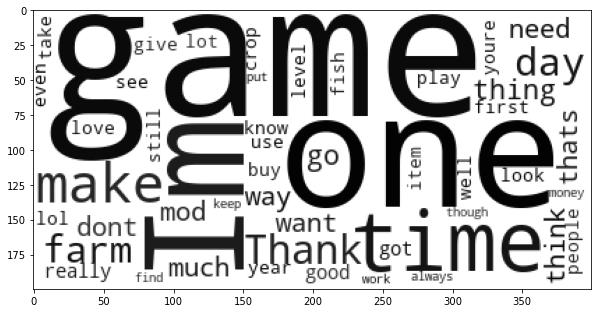

In [19]:
stp = STOPWORDS.copy()
wc = WordCloud(background_color="white", max_words=50,  stopwords=stp)
# generate word cloud
wc.generate(clean_text)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.show()

In [21]:
from nltk.collocations import *
def common_bigrams(tokenized_text, min_freq, top_n):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokenized_text)
    finder.apply_freq_filter(min_freq)
    finder.nbest(bigram_measures.pmi, top_n)
    return finder.nbest(bigram_measures.pmi, top_n)

print(common_bigrams(clean_text_t, 10, 10))

[('Community', 'Center'), ('Prairie', 'King'), ('Concerned', 'Ape'), ('prismatic', 'shard'), ('ultra', 'wide'), ('Skull', 'Cavern'), ('Harvest', 'Moon'), ('spicy', 'eel'), ('rabbit', 'foot'), ('preserve', 'jar')]
